## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Datasets/ab_test-sales_pipeline-2.csv')
df

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1
...,...,...,...
76322,B,0,1
76323,A,0,1
76324,B,0,1
76325,B,1,0


In [12]:
total = df.groupby("test")[["conversion","no conversion"]].sum()
total

,conversion,no conversion
test,,
A,4163,30576
B,4841,36747


In [13]:
total['success rate'] = total['conversion'] / (total['conversion'] + total['no conversion'])

total

,conversion,no conversion,success rate
test,,,
A,4163,30576,0.119836
B,4841,36747,0.116404


In [14]:
value_counts = df['test'].value_counts()
value_counts

B    41588
A    34739
Name: test, dtype: int64

In [15]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
    a = df.sample(value_counts.loc['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())
    
    b = df.loc[~df.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

In [16]:
perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b
0,4117,30622,4887,36701
1,4142,30597,4862,36726
2,4103,30636,4901,36687
3,4064,30675,4940,36648
4,4124,30615,4880,36708
...,...,...,...,...
995,4127,30612,4877,36711
996,4012,30727,4992,36596
997,4074,30665,4930,36658
998,4147,30592,4857,36731


In [17]:
perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])

In [18]:
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate
0,4117,30622,4887,36701,0.118512,0.117510
1,4142,30597,4862,36726,0.119232,0.116909
2,4103,30636,4901,36687,0.118109,0.117846
3,4064,30675,4940,36648,0.116987,0.118784
4,4124,30615,4880,36708,0.118714,0.117342
...,...,...,...,...,...,...
995,4127,30612,4877,36711,0.118800,0.117269
996,4012,30727,4992,36596,0.115490,0.120035
997,4074,30665,4930,36658,0.117275,0.118544
998,4147,30592,4857,36731,0.119376,0.116788


In [19]:
perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,4117,30622,4887,36701,0.118512,0.117510,0.008459
1,4142,30597,4862,36726,0.119232,0.116909,0.019485
2,4103,30636,4901,36687,0.118109,0.117846,0.002225
3,4064,30675,4940,36648,0.116987,0.118784,-0.015366
4,4124,30615,4880,36708,0.118714,0.117342,0.011560
...,...,...,...,...,...,...,...
995,4127,30612,4877,36711,0.118800,0.117269,0.012885
996,4012,30727,4992,36596,0.115490,0.120035,-0.039353
997,4074,30665,4930,36658,0.117275,0.118544,-0.010823
998,4147,30592,4857,36731,0.119376,0.116788,0.021675


In [23]:
total_count = total
diferencia_en_proporcion = 1 - (total_count.loc['B']['success rate'] / total_count.loc['A']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


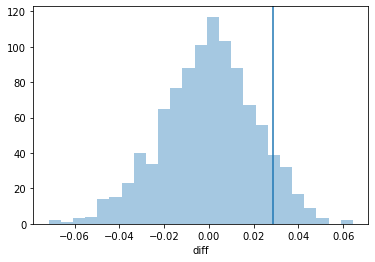

In [24]:
sns.distplot(perm_results['diff'], kde=False, norm_hist=False)
plt.axvline(diferencia_en_proporcion);

In [25]:
(perm_results['diff'] >= diferencia_en_proporcion).sum() / perm_results.shape[0]

0.083

Este valor es cercano al 5%, por lo tanto, posiblemente puede ser una prueba significativa